In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('results/h2o/mattersim_results.csv')

In [115]:
df

,num_atoms,num_parts,avg_part_size,num_mp,energy_error_abs,energy_error_pct,forces_error_max,forces_error_mae,forces_error_mape,forces_error_ratio,forces_error_mse,forces_error_rms,benchmark_time,all_partition_time,avg_partition_time
0,192,20,192.00,2,0.000000,0.000000,6.258488e-07,1.017465e-07,14.703864,4.812461e-07,1.918858e-14,1.385228e-07,1.646465,0.702572,0.035129
1,192,20,192.00,3,0.000000,0.000000,6.258488e-07,1.025072e-07,22.771533,4.848344e-07,2.022610e-14,1.422185e-07,0.072439,0.700301,0.035015
2,192,20,192.00,4,0.000000,0.000000,6.258488e-07,1.040196e-07,31.440380,4.944970e-07,2.045579e-14,1.430237e-07,0.072536,0.722924,0.036146
3,192,20,192.00,5,0.000000,0.000000,4.768372e-07,9.657374e-08,9.086937,4.600695e-07,1.822864e-14,1.350135e-07,0.073578,0.697708,0.034885
4,192,20,192.00,6,0.000000,0.000000,5.066395e-07,9.824300e-08,18.862826,4.683967e-07,1.770881e-14,1.330745e-07,0.068265,0.690789,0.034539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,34560,20,11226.05,4,0.109375,0.000064,1.330167e-03,1.140817e-05,inf,5.557202e-05,3.809216e-09,6.171885e-05,3.064391,18.187295,0.909365
66,34560,20,14810.15,5,0.046875,0.000027,2.986193e-05,3.090188e-07,20.223370,1.484280e-06,1.621453e-12,1.273363e-06,3.019372,24.156458,1.207823
67,34560,20,18855.80,6,0.062500,0.000036,1.430511e-06,1.528027e-07,inf,7.224376e-07,4.639930e-14,2.154050e-07,2.996692,30.563245,1.528162
68,34560,20,23354.35,7,0.156250,0.000091,1.341105e-06,1.529420e-07,15.988301,7.240971e-07,4.669919e-14,2.161000e-07,3.320969,37.981589,1.899079


## Partitioning

In [116]:
df['avg_part_ratio'] = df['avg_part_size'] / df['num_atoms']
avg_by_mp = df.groupby('num_mp').mean()

Text(0, 0.5, 'Proportion of All Atoms')

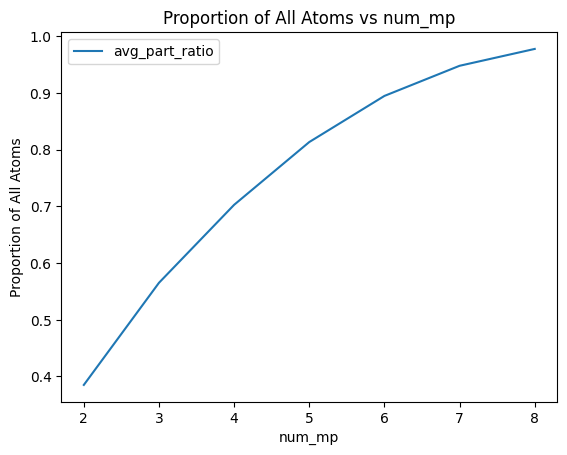

In [117]:
ax = avg_by_mp.plot(y=['avg_part_ratio'])
ax.set_title("Proportion of All Atoms vs num_mp")
ax.set_ylabel('Proportion of All Atoms')

## Timing

In [118]:
avg_by_num_atoms = df.groupby('num_atoms').mean()

Text(0, 0.5, 'Time (seconds)')

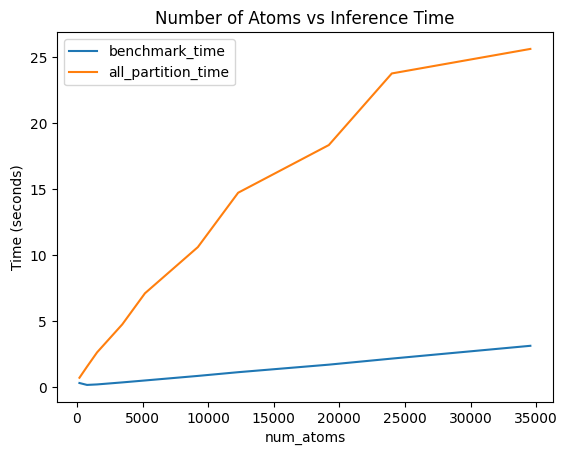

In [119]:
ax = avg_by_num_atoms.plot(y=['benchmark_time', 'all_partition_time'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Time (seconds)')

## Energy Error

In [120]:
avg_by_mp = df.groupby('num_mp').mean()

Text(0, 0.5, 'Energy (eV)')

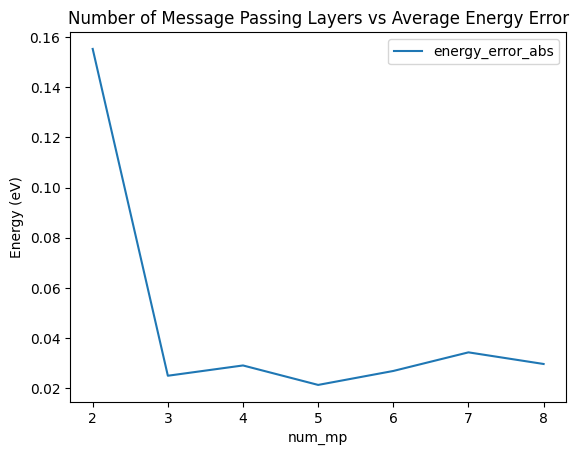

In [121]:
ax = avg_by_mp.plot(y=['energy_error_abs'])
ax.set_title("Number of Message Passing Layers vs Average Energy Error")
ax.set_ylabel("Energy (eV)")

Text(0, 0.5, 'Energy (eV)')

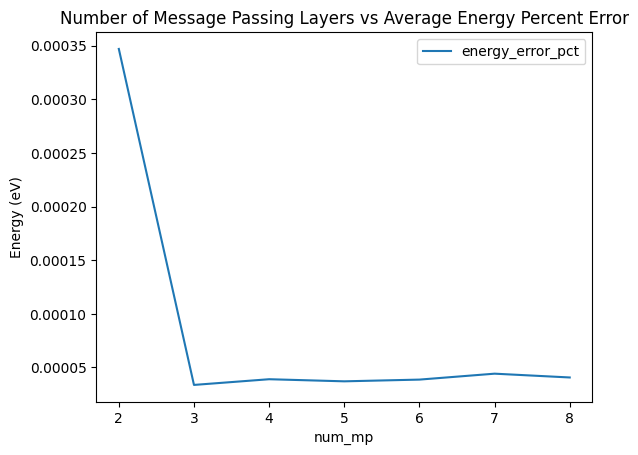

In [122]:
ax = avg_by_mp.plot(y=['energy_error_pct'])
ax.set_title("Number of Message Passing Layers vs Average Energy Percent Error")
ax.set_ylabel("Energy (eV)")

## Forces Error

Text(0, 0.5, 'Force (eV/A)')

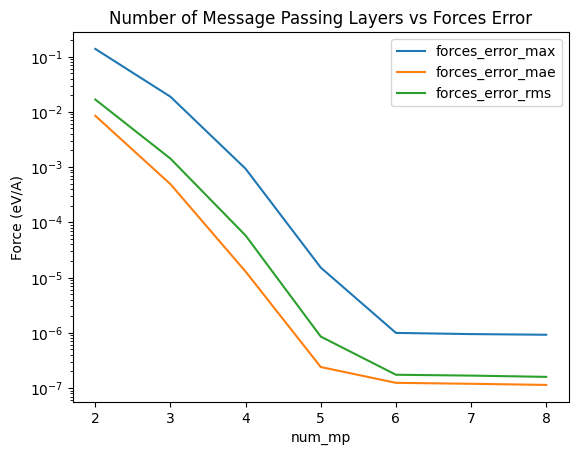

In [123]:
ax = avg_by_mp.plot(y=['forces_error_max', 'forces_error_mae', 'forces_error_rms'], logy=True)
ax.set_title("Number of Message Passing Layers vs Forces Error")
ax.set_ylabel("Force (eV/A)")

Text(0, 0.5, 'Ratio')

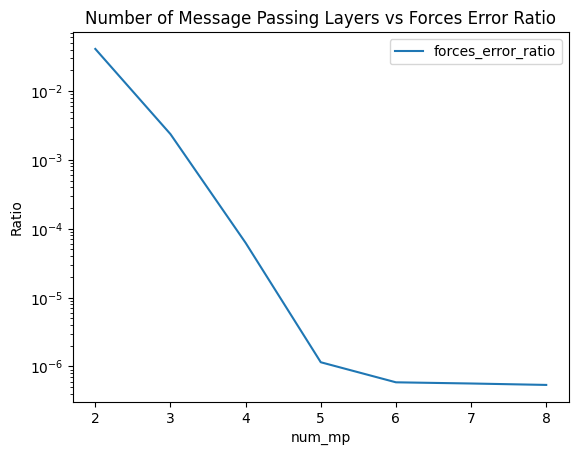

In [124]:
ax = avg_by_mp.plot(y=['forces_error_ratio'], logy=True)
ax.set_title("Number of Message Passing Layers vs Forces Error Ratio")
ax.set_ylabel("Ratio")